<a href="https://colab.research.google.com/github/HarshaPriya03/PythonLearning/blob/main/Statistics_Practical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
tips = pd.read_csv('tips.csv')

In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
tips['total_bill'].mean()

np.float64(19.78594262295082)

In [ ]:
tips['total_bill'].median()

17.795

In [ ]:
tips['sex'].mode()

,sex
0,Male


In [ ]:
tips['total_bill'].std()

8.902411954856856

In [ ]:
tips['total_bill'].var()

79.25293861397826

In [ ]:
tips.describe(include = 'object')

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


In [ ]:
tips.describe()   #statistical description of the data

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


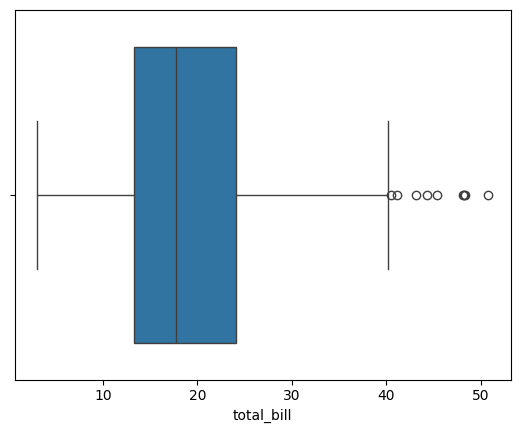

In [ ]:
sns.boxplot(x = 'total_bill', data = tips)
plt.show()

In [ ]:
tips['total_bill'].corr(tips['tip'])  #pearson correlation coefficient

np.float64(0.6757341092113641)

<Axes: xlabel='total_bill', ylabel='tip'>

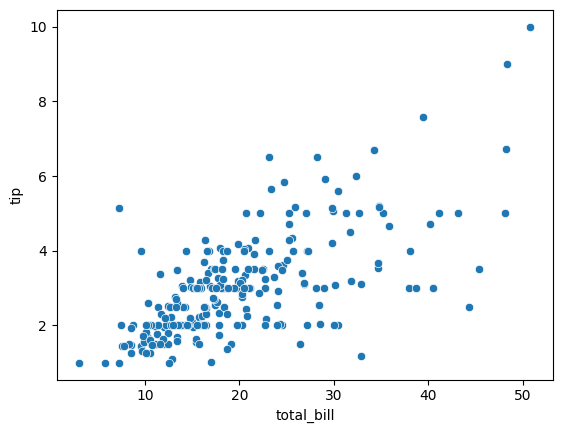

In [ ]:
sns.scatterplot(x = 'total_bill', y = 'tip', data = tips)

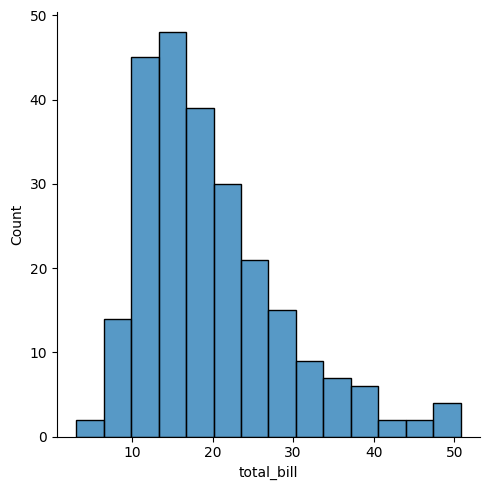

In [ ]:
sns.displot(x = 'total_bill', data = tips)

<Axes: xlabel='total_bill', ylabel='Density'>

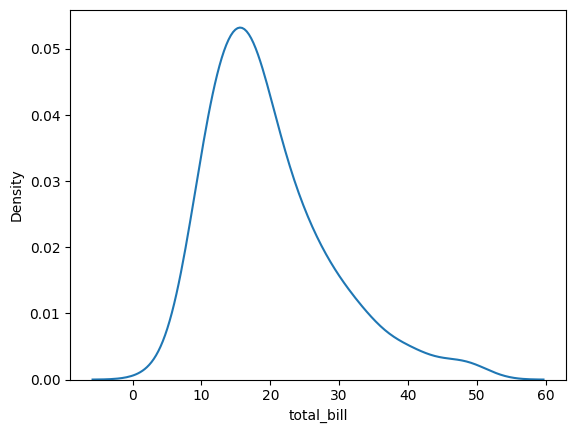

In [ ]:
sns.kdeplot(x = 'total_bill', data = tips)

### **Case Study: Swiggy (Operations & Logistics)**

**The Problem Statement**:It is Friday night in Indiranagar, Bangalore (a high-demand zone). Swiggy needs to display an "Estimated Delivery Time" (ETA) on the app home screen.
- If they show a time that is too short (e.g., "30 mins") and deliver in 45, customers get angry (Churn Risk).
- If they show a time that is too long (e.g., "60 mins") when it usually takes 40, customers don't order (Revenue Loss).
- **The Goal**: Calculate the 95% Confidence Interval for the true average delivery time to define a safe "buffer" range (e.g., "35-45 mins").

**Step 1: Decide the Sample Size ($n$)**

We cannot look at all past data instantly. We need to query a sample of recent Friday orders.
- **Constraint**: We want our estimate to be accurate within $\pm$ 2 minutes (Margin of Error, $E$).
- **Historical Knowledge**: From previous Fridays, we know the standard deviation ($\sigma$) is roughly 10 minutes.
- The Formula:$$n = \left( \frac{Z \cdot \sigma}{E} \right)^2$$

- $Z$ for 95% Confidence = 1.96
- $\sigma$ (Standard Deviation) = 10 minutes
- $E$ (Margin of Error) = 2 minutes

**Decision**: We need to query at least 97 orders. Let's round up to 100 for safety.

In [ ]:
heart = pd.read_csv('heart.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'heart.csv'

In [ ]:
heart.head()

NameError: name 'heart' is not defined

In [ ]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### There are two ways to deal with outliers :

1. Data Transformation

    1.1 Log Transformation
    1.2 Square Root Transformation
    1.3 Box-Cox Transformation

2. Remove the rows containing the outliers.

In [ ]:
def remove_outlier(data, columns):
  for column in columns:
    if column in data.columns:  #check whether the column name is correct
      Q1 = data[column].quantile(0.25)
      Q3 = data[column].quantile(0.75)
      IQR = Q3 - Q1
      lower_bound = Q1 - 1.5*IQR
      upper_bound = Q3 + 1.5*IQR
      data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

  return data

In [ ]:
data_without_outliers = remove_outlier(heart, heart.columns)

In [ ]:
data_without_outliers.shape

(228, 14)